PIMA Idians Diabetes Dataset. My assignment is to use Logistic Regression, Decision Tree, Random Forest, Supported Vector Machine and K Nearest Neighbor to predict the outcome and then do a report to the professor.

In [118]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

path= "/kaggle/input/pima-indians-diabetes-database/diabetes.csv"
file = pd.read_csv(path)
file.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [119]:
file.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


0    500
1    268
Name: Outcome, dtype: int64


<AxesSubplot:xlabel='Outcome', ylabel='count'>

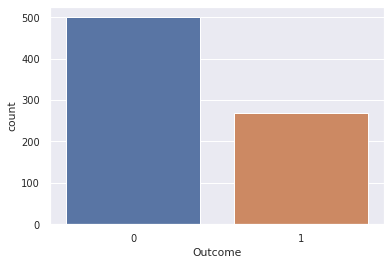

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
y= file.pop('Outcome')
X= file
print(y.value_counts())
sns.countplot(y)

In [28]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


All data is numeric and there is no missing. **however**

Number of patient that has 0 in Bloodpressure: 35 percentage: 4.56


<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

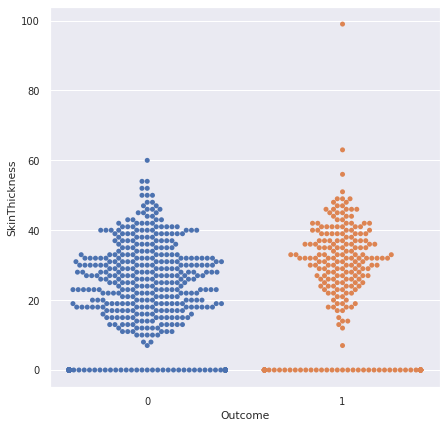

In [121]:
bP0=file[file["BloodPressure"] == 0].shape[0]
print("Number of patient that has 0 in Bloodpressure:",bP0, "percentage:", round(bP0/file.shape[0]*100,2) )
plt.figure(figsize=(7,7))
sns.swarmplot(x=y, y=file["SkinThickness"])

We know that living human aren't supposed to have 0 blood pressure, right? So we may need to deal with this missing data. And why did they choose to use 0 instead of Nan, if the same thing happen in pregnancies, we would never know.

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

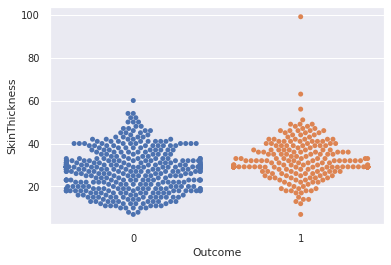

In [122]:
#clean the dataset
BP_mean = file[file["BloodPressure"] != 0]["BloodPressure"].mean()
file["BloodPressure"] = file["BloodPressure"].replace(0,BP_mean)

SKT_mean = file[file["SkinThickness"] != 0]["SkinThickness"].mean()
file["SkinThickness"] = file["SkinThickness"].replace(0,SKT_mean)

sns.swarmplot(x=y, y=file["SkinThickness"])

Split the dataset into three. We will tune the parameter to achive the best score on validation set and then apply on the test set for final result

In [31]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)
print(f"Train shape: {X_train.shape[0]}\nValidation shape: {X_val.shape[0]}\nTest shape: {X_test.shape[0]}")

Train shape: 491
Validation shape: 123
Test shape: 154


In [32]:
#utility function
def evaluation(p,y):
    matrix=np.zeros((2,2))
    for i in range(len(y)):
        matrix[ round(p[i]) ] [y[i]]+=1
    #True+, True-, False+, False-    
    tp,tn,fp,fn=matrix[1,1], matrix[0,0], matrix[1,0], matrix[0,1]
    accuracy=round( (tp+tn)/ (tp+tn+fn+fp),5)
    precision= round(tp/ (tp+fp),5)
    recall= round(tp/(tp+fn),5)
    f_score= round(2*precision*recall/ (precision+recall),5)
    return accuracy,tp,tn,fp,fn, precision, recall, f_score

def Visualized_matrix(result):
  #plt.figure(figsize=(7,5))
  sns.set(font_scale=0.9)
  res=[ [result[1],result[3]] , [result[4],result[2]] ]
  ax=sns.heatmap(res,annot=True, annot_kws={"size": 13},fmt='g',
  xticklabels=['Positive','Negative'],yticklabels=['Positive','Negative']) 
  ax.set(xlabel='True Value',ylabel='Predict value') 

def Validation_graph(log, list, x_label):
    plt.figure(figsize=(12,4))
    plt.ylabel("accuracy")
    plt.xlabel(x_label)
    sns.lineplot(y = log[0], x=list, label="Train accuracy")
    sns.lineplot(y = log[1], x=list, label="Validation accuracy")

def result_output(result):
    print("accuracy:",result[0],"\nprecison:",result[5],"\nrecall:",result[6],"\nf-score:",result[7])


In [33]:
try:
    combine=[X_train, X_val ,X_test, y_train, y_val, y_test]
    X_train, X_val ,X_test, y_train, y_val, y_test=[dts.to_numpy() for dts in combine]
except:
    pass

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

accuracy: 0.73171 
precison: 0.66667 
recall: 0.42857 
f-score: 0.52174


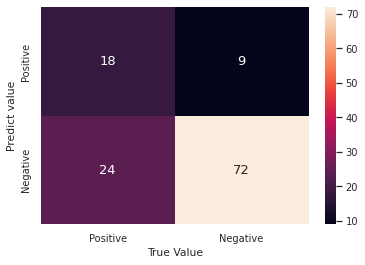

In [95]:
#Logistic regression
#Logistic regression require the data to be scaled in order to prevent biases
try:
    combine=[X_train,X_test,y_train,y_test]
    X_train,X_test,y_train,y_test=[dts.to_numpy() for dts in combine]
except:
    pass

def min_max_scale(dataset):
    for i in range(len(dataset.T)):
        z=np.zeros(len(dataset.T))
        min_x,max_x=min(dataset.T[i]),max(dataset.T[i])
        for j in range(len(dataset.T[i])):
            dataset.T[i][j] = float(( dataset.T[i][j] - min_x)/( max_x - min_x))
    return dataset        

X_train0, X_val0, X_test0 = X_train.copy(),X_val.copy(),X_test.copy()
X_combine = [X_train0,X_val0,X_test0]
X_train0, X_val0, X_test0 = [min_max_scale(ele) for ele in X_combine]                               

model_LR = LogisticRegression(random_state=0, class_weight={0:.4, 1:.5})
model_LR.fit(X_train0,y_train)
predict = model_LR.predict(X_val0)
result = evaluation(predict, y_val)
result_output(result)
Visualized_matrix(result)

accuracy: 0.74675 
precison: 0.64815 
recall: 0.63636 
f-score: 0.6422


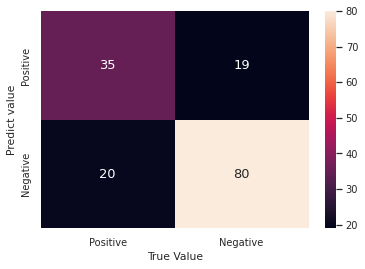

In [96]:
predict = model_LR.predict(X_test0)
result = evaluation(predict, y_test)
result_output(result)
Visualized_matrix(result)

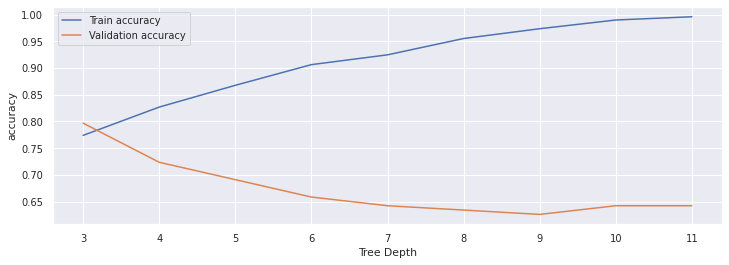

In [37]:
#decision tree using gini

#try model with multiple parameter on validation dataset for better result
depth_list=np.arange(3,12)
log = np.zeros((2,len(depth_list)))

for i,depth in enumerate(depth_list):
    model_tree= DecisionTreeClassifier(max_depth=depth)
    model_tree.fit(X_train, y_train)
    
    predict_train = model_tree.predict(X_train)
    predict = model_tree.predict(X_val)
    result_train = evaluation(predict_train, y_train)
    result = evaluation(predict, y_val)
    log[0][i], log[1][i] = result_train[0], result[0]
    
#change in accuracy
Validation_graph(log, depth_list,"Tree Depth")

accuracy: 0.76623 
precison: 0.69388 
recall: 0.61818 
f-score: 0.65385


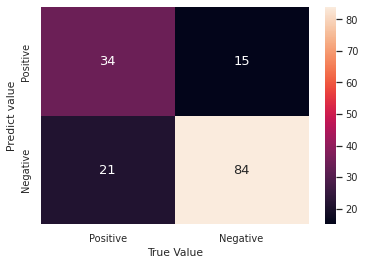

In [88]:
#we pick the parameter that perform the best from the above output to predict the test value
model_tree= DecisionTreeClassifier(max_depth=3)
model_tree.fit(X_train, y_train)
predict_test = model_tree.predict(X_test)
result = evaluation(predict_test, y_test)
result_output(result)
Visualized_matrix(result)

[Text(0.5, 0.875, 'Glucose <= 127.5\n0.454\n491\n[320, 171]'),
 Text(0.25, 0.625, 'Age <= 30.5\n0.322\n312\n[249, 63]'),
 Text(0.125, 0.375, 'BMI <= 49.1\n0.157\n198\n[181, 17]'),
 Text(0.0625, 0.125, '0.142\n195\n[180, 15]'),
 Text(0.1875, 0.125, '0.444\n3\n[1, 2]'),
 Text(0.375, 0.375, 'BMI <= 26.95\n0.481\n114\n[68, 46]'),
 Text(0.3125, 0.125, '0.0\n21\n[21, 0]'),
 Text(0.4375, 0.125, '0.5\n93\n[47, 46]'),
 Text(0.75, 0.625, 'BMI <= 29.85\n0.479\n179\n[71, 108]'),
 Text(0.625, 0.375, 'Glucose <= 160.0\n0.423\n46\n[32, 14]'),
 Text(0.5625, 0.125, '0.291\n34\n[28, 6]'),
 Text(0.6875, 0.125, '0.444\n12\n[4, 8]'),
 Text(0.875, 0.375, 'Age <= 31.5\n0.414\n133\n[39, 94]'),
 Text(0.8125, 0.125, '0.497\n52\n[24, 28]'),
 Text(0.9375, 0.125, '0.302\n81\n[15, 66]')]

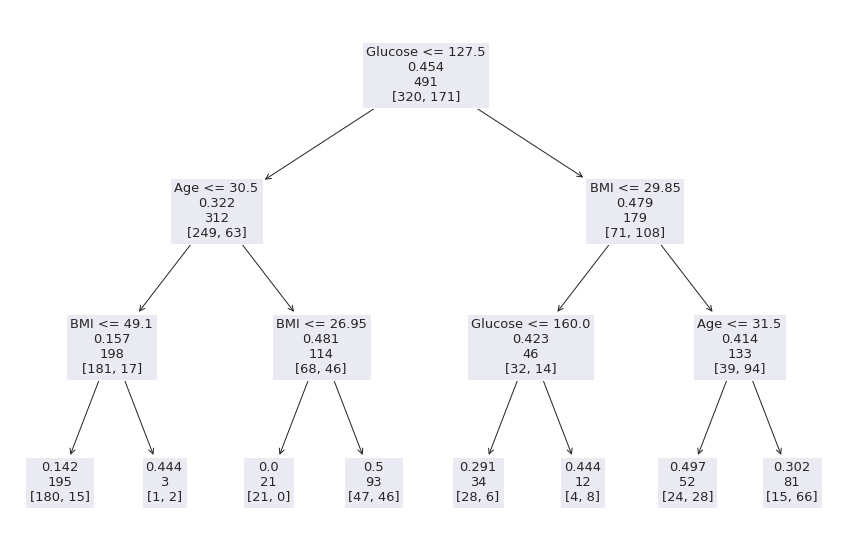

In [39]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(model_tree,feature_names=file.columns, label='none',fontsize=13)

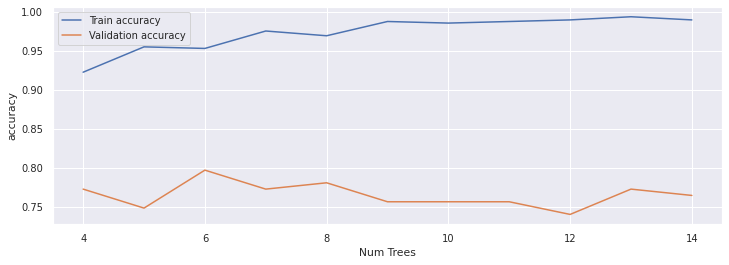

In [98]:
#Random Forest
n_list=np.arange(4,15)
log = np.zeros((2,len(n_list)))

for i,n_est in enumerate(n_list):
    model_forest = RandomForestClassifier(n_estimators= n_est, random_state= 0)
    model_forest.fit(X_train, y_train)
    
    predict_train = model_forest.predict(X_train)
    predict = model_forest.predict(X_val)
    result_train = evaluation(predict_train, y_train)
    result = evaluation(predict, y_val)
    log[0][i], log[1][i] = result_train[0], result[0]
    
#change in accuracy
Validation_graph(log, n_list, "Num Trees")

accuracy: 0.72727 
precison: 0.63265 
recall: 0.56364 
f-score: 0.59615


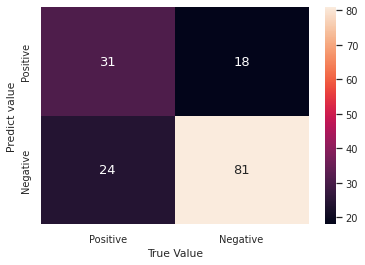

In [99]:
#picking the best n_estimator from the output above to feed the model
model_forest = RandomForestClassifier(n_estimators= 6, random_state= 0)
model_forest.fit(X_train, y_train)
predict_test = model_forest.predict(X_test)
result = evaluation(predict_test, y_test)
result_output(result)
Visualized_matrix(result)

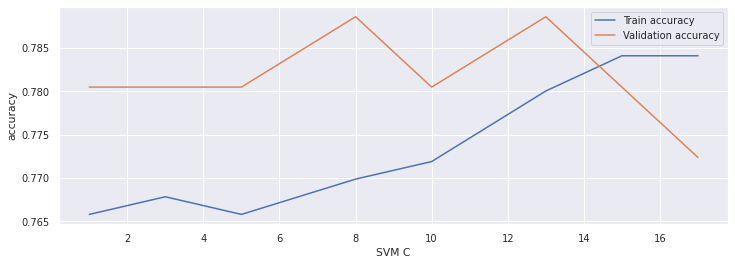

In [70]:
#SVM with rbf kernel
C_list=[1,3,5,8,10,13,15,17]
log = np.zeros((2,len(C_list)))
for i,c in enumerate(C_list):
    model_svm = SVC(C= c)
    model_svm.fit(X_train, y_train)
    
    predict_train = model_svm.predict(X_train)
    predict = model_svm.predict(X_val)
    result_train = evaluation(predict_train, y_train)
    result = evaluation(predict, y_val)
    log[0][i], log[1][i] = result_train[0], result[0]
    
Validation_graph(log, C_list, "SVM C")

accuracy: 0.75974 
precison: 0.6875 
recall: 0.6 
f-score: 0.64078


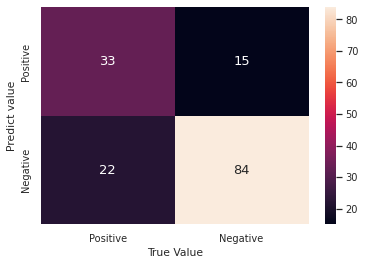

In [101]:
#picking the best c to run 

model_svm = SVC(C=8, random_state= 0)
model_svm.fit(X_train, y_train)
predict_test = model_svm.predict(X_test)
result = evaluation(predict_test, y_test)
result_output(result)
Visualized_matrix(result)

accuracy: 0.75325 
precison: 0.65455 
recall: 0.65455 
f-score: 0.65455


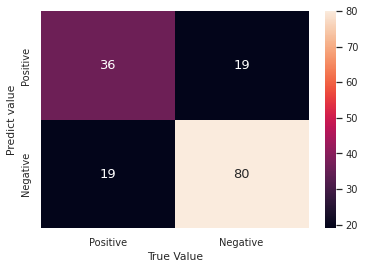

In [52]:
model_svm = SVC(C= 8, kernel='linear')
model_svm.fit(X_train, y_train)
predict_test = model_svm.predict(X_test)
result = evaluation(predict_test, y_test)
result_output(result)
Visualized_matrix(result)

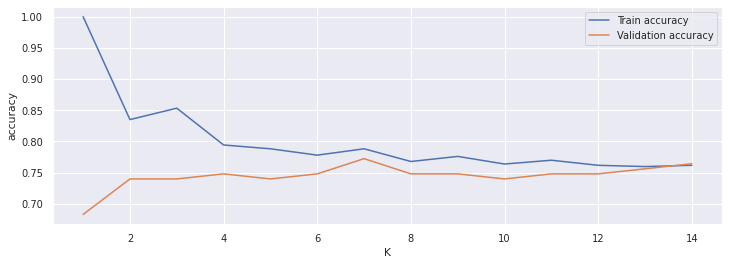

In [45]:
model_k = KNeighborsClassifier

k_list=np.arange(1,15)
log = np.zeros((2,len(k_list)))

for i,k in enumerate(k_list):
    model_k = KNeighborsClassifier(k)
    model_k.fit(X_train, y_train)
    
    predict_train = model_k.predict(X_train)
    predict = model_k.predict(X_val)
    result_train = evaluation(predict_train, y_train)
    result = evaluation(predict, y_val)
    log[0][i], log[1][i] = result_train[0], result[0]
    
Validation_graph(log,k_list,"K")  

accuracy: 0.72078 
precison: 0.62 
recall: 0.56364 
f-score: 0.59048


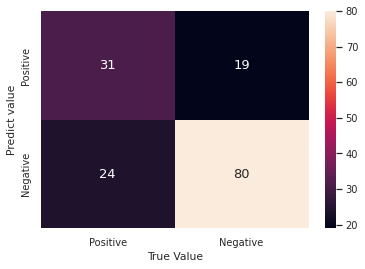

In [116]:
#Predict on test dataset

model_k = KNeighborsClassifier(n_neighbors=12)
model_k.fit(X_train, y_train)
predict_test = model_k.predict(X_test)
result = evaluation(predict_test, y_test)
result_output(result)
Visualized_matrix(result)